In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

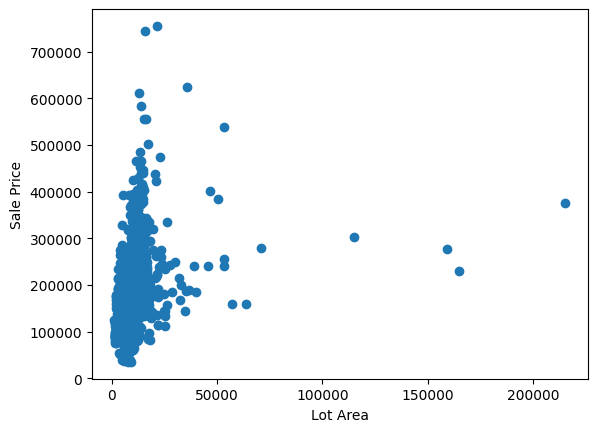

In [3]:
x = df['LotArea'].to_numpy()
y = df['SalePrice'].to_numpy()

plt.scatter(x, y)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

In [4]:
def func(y, w, b):
    return w * y + b

In [5]:
def mse_loss(y_hat, y):
    return np.mean((y_hat - y) ** 2)

In [19]:
def gradient_descent(x, y, lr=0.01, epochs=1000):

    # Chuẩn hóa dữ liệu do tham số quá lớn
    x_mean = np.mean(x)
    x_std = np.std(x)
    print(f"x_mean: {x_mean}, x_std: {x_std}")
    x_normalized = (x - x_mean) / x_std
    
    # Khởi tạo weights
    w = 1.0
    b = 0.0
    n = len(x)
    loss_history = []
    
    # Training
    for epoch in range(epochs):
        y_pred = func(x_normalized, w, b)
        
        # Tính loss
        loss = mse_loss(y_pred, y)
        
        # Tính gradient
        error = y_pred - y
        dw = (2/n) * np.sum(error * x_normalized)
        db = (2/n) * np.sum(error)
        
        # Update weights
        w = w - lr * dw
        b = b - lr * db

        loss_history.append(loss)

        # In kết quả mỗi 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch:4d}: Loss = {loss:,.2f}, w = {w:.6f}, b = {b:.2f}")
    
    # Chuyển về hệ tọa độ gốc
    w = w / x_std
    b = b - (w * x_mean / x_std)
    
    return w, b, loss_history

In [20]:
# Training model
print("🚀 Bắt đầu training...\n")
w, b, loss_history = gradient_descent(x, y, lr=0.1, epochs=1000)

print(f"\n{'='*50}")
print(f"✅ Training hoàn thành!")
print(f"📈 Kết quả:")
print(f"   w (slope) = {w:.6f}")
print(f"   b (intercept) = {b:.2f}")
print(f"{'='*50}")

🚀 Bắt đầu training...

x_mean: 10516.828082191782, x_std: 9977.846105448105
Epoch    0: Loss = 39,039,225,802.37, w = 4191.439392, b = 36184.24
Epoch  100: Loss = 5,867,752,122.51, w = 20953.196956, b = 180921.20
Epoch  200: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20
Epoch  300: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20
Epoch  400: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20
Epoch  500: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20
Epoch  600: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20
Epoch  700: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20
Epoch  800: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20
Epoch  900: Loss = 5,867,752,122.51, w = 20953.196960, b = 180921.20

✅ Training hoàn thành!
📈 Kết quả:
   w (slope) = 2.099972
   b (intercept) = 180918.98


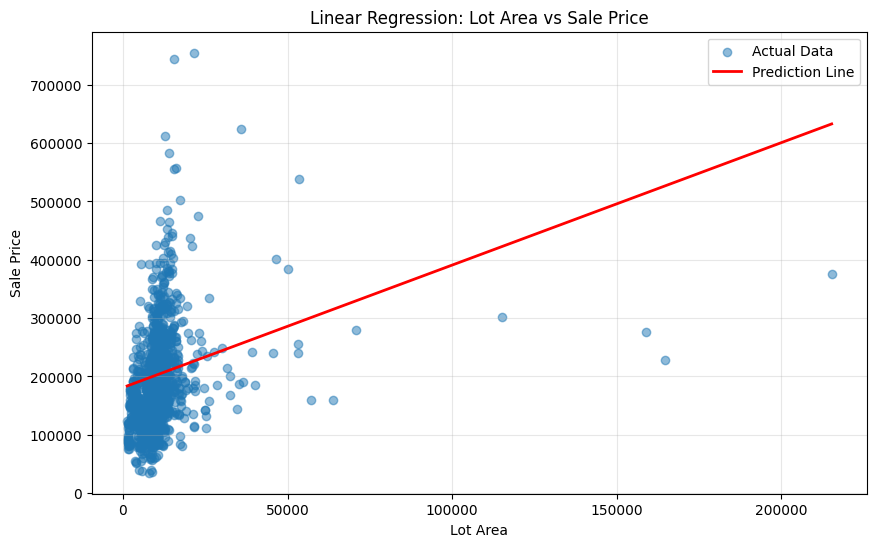

📊 Phương trình hồi quy: y = 2.1000 * x + 180918.98


In [21]:
# Vẽ kết quả
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual Data')

# Vẽ đường dự đoán (w và b đã được chuyển về hệ tọa độ gốc)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = w * x_line + b

plt.plot(x_line, y_line, 'r-', linewidth=2, label='Prediction Line')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Linear Regression: Lot Area vs Sale Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"📊 Phương trình hồi quy: y = {w:.4f} * x + {b:.2f}")


📉 Vẽ đồ thị Loss History:


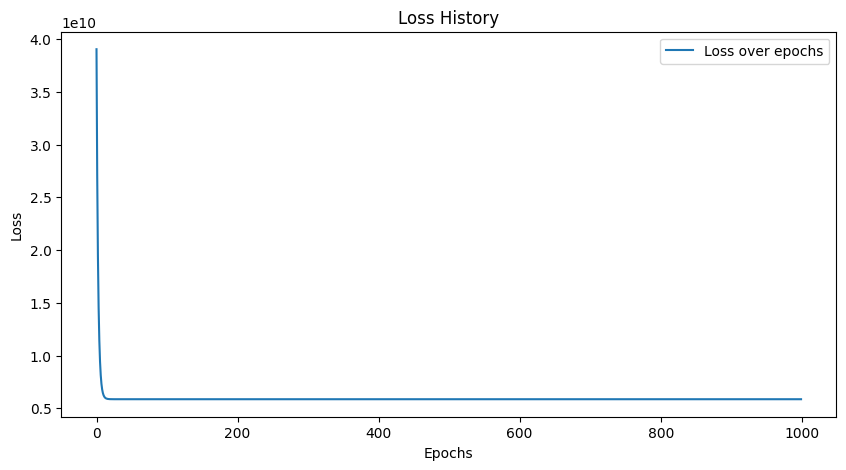

In [28]:
# Lịch sử loss

print("\n📉 Vẽ đồ thị Loss History:")
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss over epochs')   
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()